***About Dataset***

---



The **Breast Cancer Wisconsin (Diagnostic)** Dataset contains features computed from digitized images of Fine Needle Aspirate (FNA) biopsies of breast masses. These features describe the characteristics of the cell nuclei present in the images and serve as input for predictive models aimed at classifying the masses as either **malignant** or **benign**.

The dataset includes **30 real-valued features**, each describing a specific attribute of the cell nuclei. These features are derived from measurements taken from the digitized images, following a methodology detailed in the paper "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets" by K. P. Bennett and O. L. Mangasarian (1992).

The features include:

1. Radius (mean of distances from the center to points on the perimeter)

2. Texture (standard deviation of gray-scale values)

3. Perimeter

4. Area

5. Smoothness (local variation in radius lengths)

6. Compactness (perimeter² / area - 1.0)

7. Concavity (severity of concave portions of the contour)

8. Concave Points (number of concave portions of the contour)

9. Symmetry

10. Fractal Dimension (coastline approximation - 1)


Each of these features has been calculated in three forms: mean, standard error, and worst (the mean of the three largest values), resulting in a total of 30 features.

The dataset has a class distribution of **357 benign (labeled as B)** and **212 malignant (labeled as M)** samples, and no missing attribute values are present. The dataset is available for public access through the University of Wisconsin's CS FTP server and can also be found on the UCI Machine Learning Repository.

This dataset is widely used in machine learning for developing and testing models that can assist in early detection of breast cancer, providing essential insights into the diagnostic process.

## Loading Dataset

In [ ]:
#loading all libararies and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import gdown

# Google Drive File ID
file_id = '120xOxPMW-byMsGM5R93h82zU-6D-HgGZ'
url = f'https://drive.google.com/uc?id={file_id}'
destination = 'dataset.csv'

# Downloading the dataset
gdown.download(url, destination, quiet=False)

# Loading the dataset into a DataFrame
df = pd.read_csv(destination)

# Displaying the first few rows for verification
df.head()

Downloading...
From: https://drive.google.com/uc?id=120xOxPMW-byMsGM5R93h82zU-6D-HgGZ
To: /content/dataset.csv
100%|██████████| 125k/125k [00:00<00:00, 3.57MB/s]


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Checking Basic Statistics

In [ ]:
#Checking for null and dtypes
df.info()
#dataset has 0 null values and datatypes are also proper however text encoding is required foer diagnosis column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Lets check for some important statistics
df.describe()
#Unnamed 32 has unexpected values

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<ipython-input-52-16cf49a4ad8c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


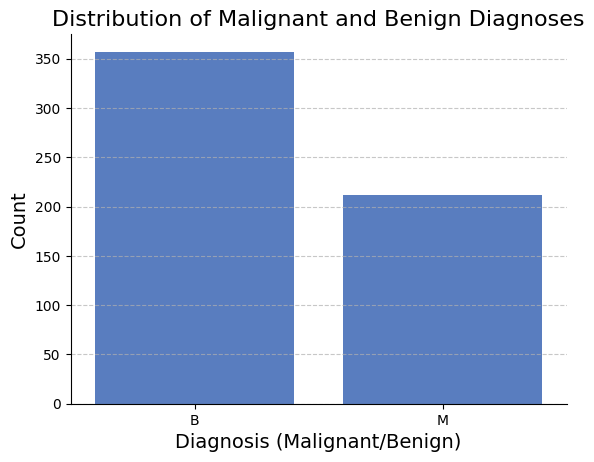

In [ ]:
#Checking the distribution of Malignant and Benign results

# Get value counts of 'diagnosis'
diagnosis_counts = df['diagnosis'].value_counts()

sns.set_palette("muted")

# Create the bar plot using Seaborn
ax = sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)

ax.set_title('Distribution of Malignant and Benign Diagnoses', fontsize=16)
ax.set_xlabel('Diagnosis (Malignant/Benign)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
sns.despine()

## Feature Engineering

In [ ]:
# Dropping the columns which are not relevant for prediction
df.drop(columns=['id','Unnamed: 32'],axis=1, inplace =True)

In [ ]:
#The target column is 'diagnosis' and the rest are features

#Coverting the target variable from categorical to numerical for model (e.g., 'M' for malignant = 1, 'B' for benign =0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate the features and target
X = df.drop('diagnosis', axis=1) #features
y = df['diagnosis'] #target variable

In [ ]:
#Splitting the data in test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#Since some columns are in 0-1 range some are in 1000's so we need to do standardization to make all features on same scale for the model

scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

## 1 - Default Logistic Regression Model

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression()

Accuracy Score:97.0
Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



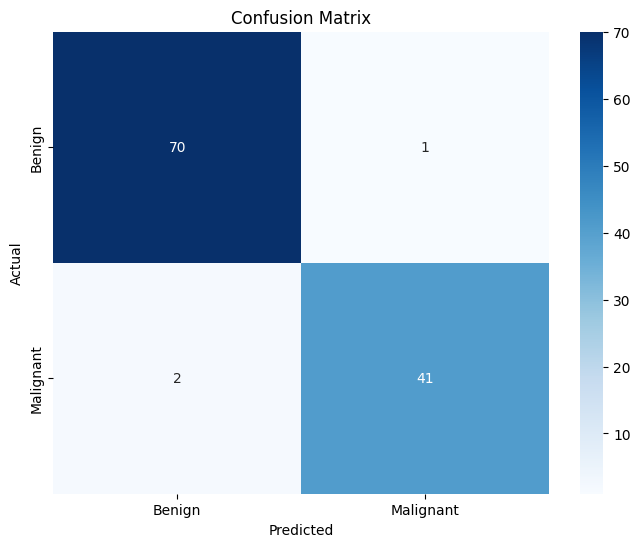

In [ ]:
# Lets Make predictions
y_pred = model.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix and classification report
print(f"Accuracy Score:{round(accuracy_score(y_test, y_pred),2)*100}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2 - Hyper parameter Tuning for Improved Model Efficiency

In [ ]:
#Hyper parameters tuning to see if we can improve the model especially recall for malignancy (1)

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength for Logistic Regression
    'penalty': ['l1','l2'],  # regularization options
    'solver': ['liblinear'],  # Solver for small datasets
}

# Set up the GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy Score:99.0%
Confusion Matrix:
 [[71  0]
 [ 1 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



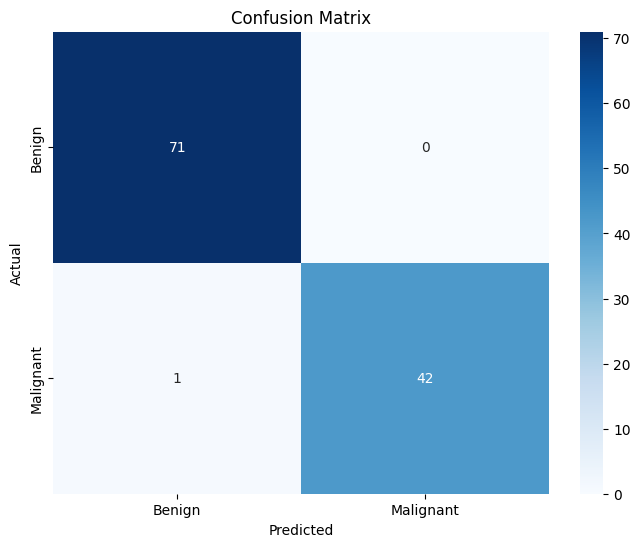

In [ ]:
#APPLYING GRID SEARCH BEST HYPER PARAMETERS

best_model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')

# Train the model on the training data
best_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix and classification report
print(f"Accuracy Score:{round(accuracy_score(y_test, y_pred),2)*100}%")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 3 - Model 2 + adjusted threshold

#### I want to adjust threshold beacuse I want to boost recall for malignant cases (1) to reduce false negatives, ensuring fewer malignant cases are missed, so that cancer is detected as early as possible for quick treatment, athough it may increase false positives.

Accuracy Score:96.0
Confusion Matrix:
 [[67  4]
 [ 1 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



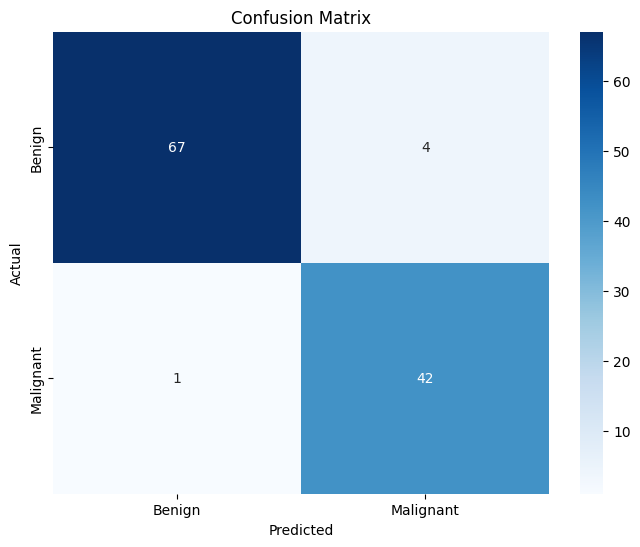

In [ ]:
# Applying threshold to control the false negative to hyperparametered model

# Predict probabilities on the test data
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Geting the probability for the positive class (1) here

# Adjust the threshold to 0.3 for classification
threshold = 0.3
y_pred = (y_prob > threshold).astype(int)  # If probability > 0.3, classify as 1 (malignant), otherwise 0 (benign)

# Print the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy Score:{round(accuracy_score(y_test, y_pred),2)*100}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 4 - Default Logistic Regression Model + PCA

In [ ]:
# Let go ahead with PCA also to check if compressing some irrelevant/redundant columns can help our model to predict better as a result of low complexity

# `feature_names` is a list of 33 feature column names

feature_names = X_train.columns.tolist()  # Get column names from the training DataFrame

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': np.abs(model.coef_[0])  # Absolute value of coefficients, # 'model'is our trained basic logistic regression model

})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display top features
print(feature_importance)

                    Feature  Coefficient
21            texture_worst     1.350606
10                radius_se     1.268178
28           symmetry_worst     1.208200
7       concave points_mean     1.119804
26          concavity_worst     0.943053
13                  area_se     0.907186
20             radius_worst     0.879840
23               area_worst     0.841846
6            concavity_mean     0.801458
27     concave points_worst     0.778217
15           compactness_se     0.682491
19     fractal_dimension_se     0.616230
12             perimeter_se     0.610583
22          perimeter_worst     0.589453
24         smoothness_worst     0.544170
5          compactness_mean     0.540164
18              symmetry_se     0.500425
3                 area_mean     0.465210
0               radius_mean     0.431904
2            perimeter_mean     0.393432
1              texture_mean     0.387326
14            smoothness_se     0.313307
17        concave points_se     0.311300
8             sy

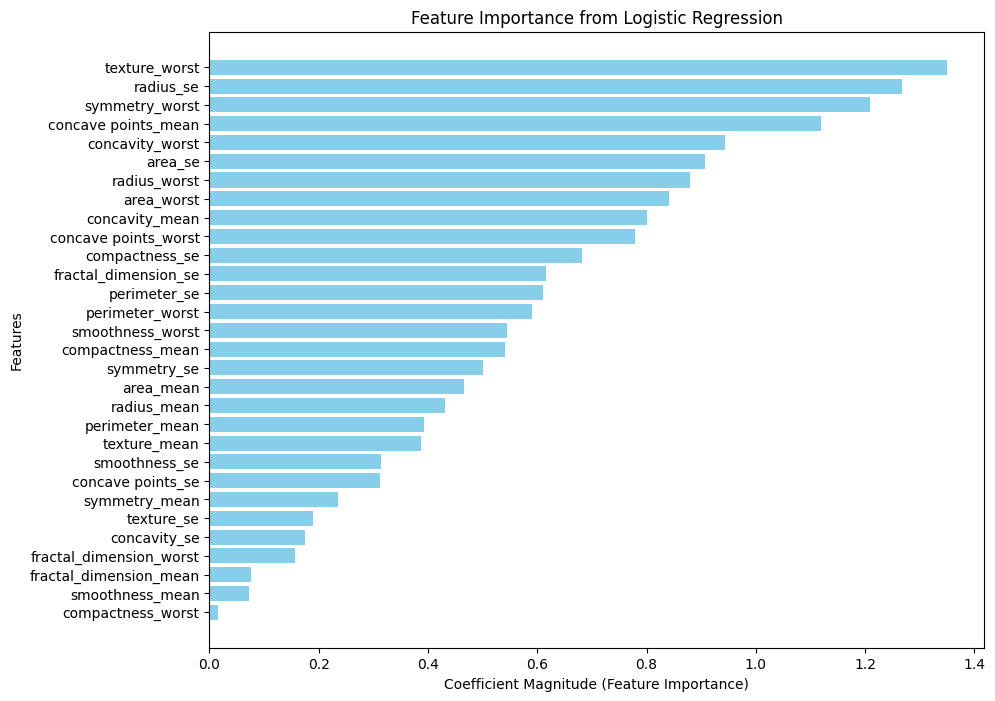

In [ ]:
# Visualizing the top features which have impact on our prediction

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Coefficient Magnitude (Feature Importance)')
plt.ylabel('Features')
plt.title('Feature Importance from Logistic Regression')
plt.show()

In [182]:
# # Initializing PCA

# Checking the explained variance by each selected feature in PCA
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")
print(f"Total components selected: {pca.n_components_}")

Explained Variance by each component: [0.43502782 0.19500007 0.09781519 0.06486409 0.05253378 0.041128
 0.0223559  0.01647952 0.01380052 0.01205262]
Total components selected: 10


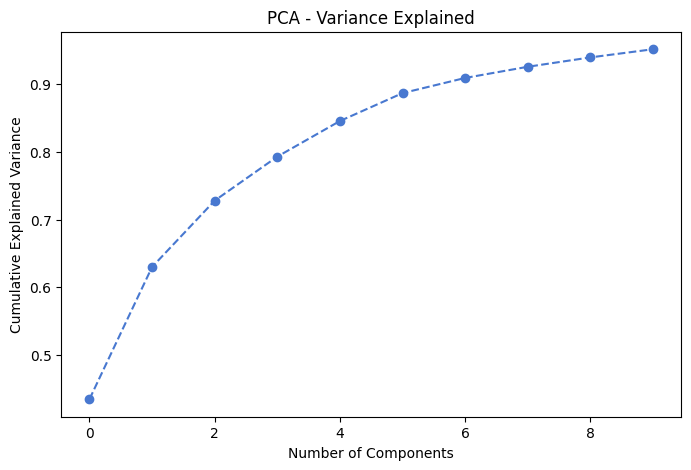

In [183]:
#Lets plot our selected 10 features and how much variance they explain

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Variance Explained')
plt.show()

Accuracy Score:98.0
Confusion Matrix:
 [[70  1]
 [ 1 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



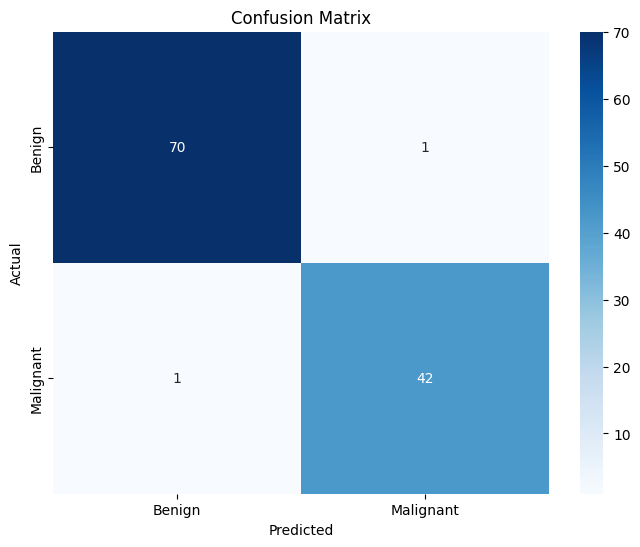

In [186]:
# Applying PCA on the training and testing data

pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Logistic Regression on PCA-transformed data
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy Score:{round(accuracy_score(y_test, y_pred_pca),2)*100}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_pca))

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 5 - 4th Model + adjusted Threshold

Accuracy Score:96.0
Confusion Matrix (Threshold = 0.3):
 [[67  4]
 [ 1 42]]

Classification Report (Threshold = 0.3):
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



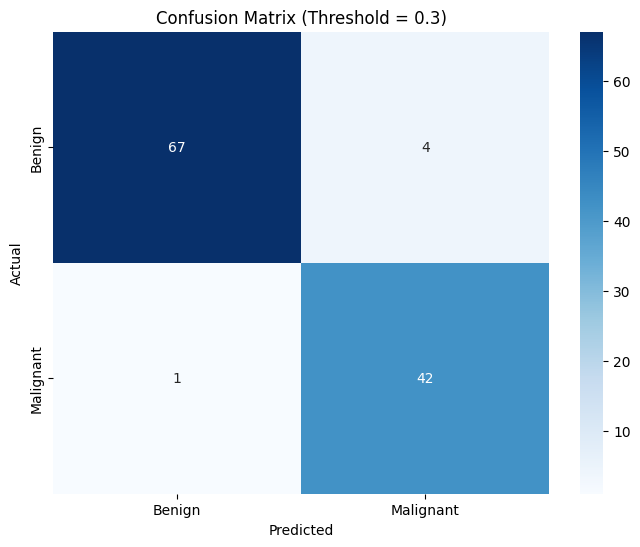

In [190]:
# PCA WITH THRESHOLD FOR DETECTING MAX MALINANCY, LETS SEE IF THAT MAKES ANY DIFFERENCE

# Get prediction probabilities
y_pred_probs = model_pca.predict_proba(X_test_pca)[:, 1]  # Probabilities for class 1 (malignant)

# Setting a new threshold
threshold = 0.3  #Lowering threshold to increase recall
y_pred_adjusted = (y_pred_probs >= threshold).astype(int)

# Evaluating the new predictions
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print(f"Accuracy Score:{round(accuracy_score(y_test, y_pred_adjusted),2)*100}")
print("Confusion Matrix (Threshold = {}):\n".format(threshold), cm_adjusted)

# Classification Report
print("\nClassification Report (Threshold = {}):\n".format(threshold), classification_report(y_test, y_pred_adjusted))

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

## 6 - Hyper Parameter tuned 5th model

Accuracy Score:96.0
Confusion Matrix (Threshold = 0.3):
 [[67  4]
 [ 1 42]]

Classification Report (Threshold = 0.3):
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



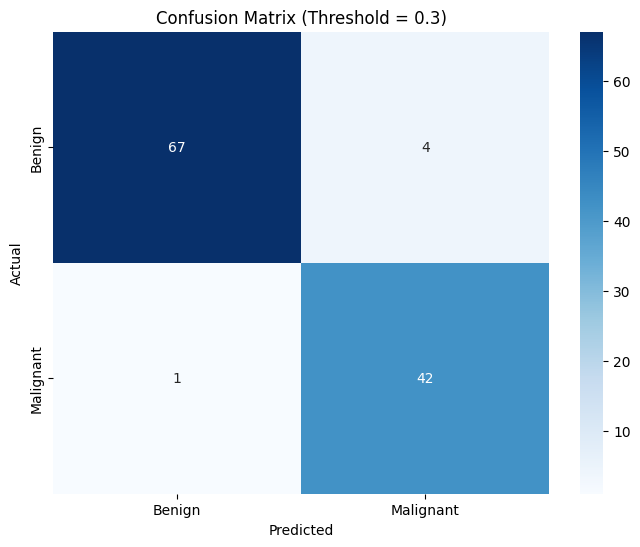

Number of non-zero features: 10
  Feature  Coefficient
0     PC1     1.437824
1     PC2    -0.720751
3     PC4     0.436158
4     PC5     0.423801
2     PC3    -0.342798
8     PC9    -0.297053
7     PC8     0.258173
9    PC10    -0.173505
5     PC6    -0.111252
6     PC7     0.013615


In [192]:
# 5th MODEL WITH HYPERPARAMETERS AS IDENTIFIED EARLIER IN GRID SEARCH

# Train Logistic Regression with L2 regularization and C=0.1
model_pca = LogisticRegression(penalty='l2', C=0.1, solver='liblinear')  #liblinear best for small datasets
model_pca.fit(X_train_pca, y_train)

# Get prediction probabilities
y_pred_probs = model_pca.predict_proba(X_test_pca)[:, 1]  # Probabilities for class 1 (malignant)

# Adjusting the threshold
threshold = 0.3  # Lowering threshold to increase recall
y_pred_adjusted = (y_pred_probs >= threshold).astype(int)

# Evaluating the new predictions
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print(f"Accuracy Score:{round(accuracy_score(y_test, y_pred_adjusted),2)*100}")
print("Confusion Matrix (Threshold = {}):\n".format(threshold), cm_adjusted)

# Classification Report
print("\nClassification Report (Threshold = {}):\n".format(threshold), classification_report(y_test, y_pred_adjusted))

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

# Display coefficients to check sparsity
feature_importance = pd.DataFrame({
    'Feature': [f'PC{i+1}' for i in range(X_train_pca.shape[1])],  # Principal component names
    'Coefficient': model_pca.coef_[0]
})
sparse_features = feature_importance[feature_importance['Coefficient'] != 0]
print(f"Number of non-zero features: {len(sparse_features)}")
print(sparse_features.sort_values(by='Coefficient', key=abs, ascending=False))


## Conclusion

Base Model with Hyper Parameters Tuned using GridSearch (Model 2) gave the best result out of my 6 different models.

**Selected Model Overview**

Model 2 shows excellent performance in classifying benign and malignant cases with an overall accuracy of 99%. Specifically:

*Class 0 (Benign):* The model achieved a precision of 0.99 and a recall of 1.00, which indicates that it is highly effective at correctly identifying benign cases without any false positives.

*Class 1 (Malignant):* The model achieved a precision of 1.00 and a recall of 0.98, meaning that it effectively detects malignant cases, though there is still a very small chance of a false negative (1 case incorrectly identified as benign).

The f1-score for both classes is high (0.99), suggesting that the model is well-balanced in terms of precision and recall for both classes.
The confusion matrix reveals only a single false negative (1 case), and no false positives, confirming that the model has a minimal error rate.
This makes the model highly suitable for healthcare applications, particularly in identifying malignant cases, where false negatives are critical and should be minimized.

In summary, the model is highly effective for this binary classification task and would be reliable for use in a healthcare setting, where both precision (minimizing false positives) and recall (maximizing true positives) are important.

**The overall accuracy is 99% with 98% malignant cases being detected effectively (which is the most important parameter in any medical setting as the repercussions of getting a negtive test (when in reality it is a cancer) is far more than getting a false positve).**

**By going through all the possible logistic regression possiblities I have improved the overall model accurary by 2% and false negative by 3% which is of paramount importance in tests like FNA, over basic logistic regression ML model**